In [13]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from Utils import paths
from Utils.pandas_utils import extract_dict

In [7]:
xlabel_font_size = 20
both_ticks_label_size = 15
legend_font_size = 15

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
y_limits = (0.14, 0.87)

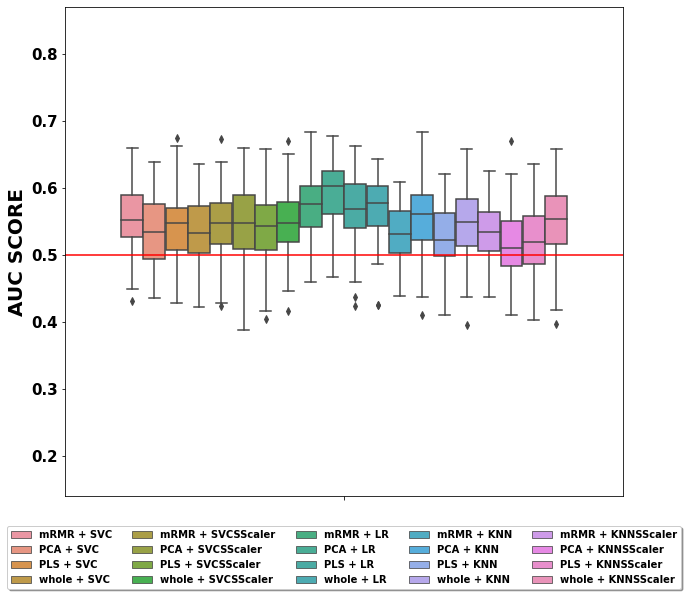

In [45]:

def extract_data_csv(csv_file: 'str', extract_metric: 'str', source: 'str') -> pd.DataFrame:
    """

    :param csv_file:
    :param extract_metric:
    :param source:
    :return:
    """
    results_data = pd.read_csv(f"{csv_file}", sep=';')
    results_data[extract_metric] = results_data['METRICS_DICT'].apply(lambda x: extract_dict(x, extract_metric))
    results_data = results_data[['DATASET', 'CLASSIFIER_NAME', 'PREPROCESS', extract_metric]]
    results_data['MODEL_NAME'] = results_data['PREPROCESS'] + " + " + results_data['CLASSIFIER_NAME']
    results_data = results_data[['MODEL_NAME', 'DATASET'] + [extract_metric]]
    results_data['DATASET'] += f"_{source}"

    return results_data


files_dict = {
    'Base': '28_02_22_results_main_experiment',
    'Filtrado': '28_03_22_results_main_experiment_filtered'
}

filter_set_trans = {
    'Base': 'BASE',
    'Filtrado': 'FILTERED'
}

metrics = 'AUC_SCORE'
datasets = 'CC'
filtersets = 'Base'

for metric in ['AUC_SCORE', 'BAL_ACC']:
    for filterset in ['Base', 'Filtrado']:
        for dataset in ['CC']:

            extract_results_data = extract_data_csv(f"{paths.RESULTS_PATH}/{files_dict[filterset]}.csv",
                                                 extract_metric=metric, source=filterset)

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
            stripplot_data = extract_results_data[extract_results_data.DATASET == f'{dataset}_{filterset}']
            sns.boxplot(data=stripplot_data, y=metric, x='DATASET', hue='MODEL_NAME', dodge=True, ax=ax)

            box = ax.get_position()
            ax.set_position([box.x0, box.y0 + box.height * 0.1,
                             box.width, box.height * 0.9])

            for idx, _ in enumerate(stripplot_data.DATASET.unique()[:-1]):
                ax.axvline(x=idx + 0.5)

            ax.set_ylabel(metric.replace('_', ' '), fontsize=xlabel_font_size)
            ax.axhline(0.5, color='red')

            ax.set_ylim(y_limits)
            ax.set_xlabel('')
            ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)
            ax.set_xticklabels([], fontsize=xlabel_font_size)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                      fancybox=True, shadow=True, ncol=5)

            # plt.tight_layout()
            plt.savefig(f"{paths.PLOTS_MEMORIA_PATH}/4_5_{filterset}_{dataset}_{metric}_plot_just_legend.pdf", bbox_inches='tight')
            break
        break
    break